In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [24]:
# m is the number of training examples
z_train = np.array([np.array([1,2]), np.array([1]), np.array([12,3,4])], dtype=object)
print(f"z_train.shape: {z_train[0].shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

z_train.shape: (2,)
Number of training examples is: 2


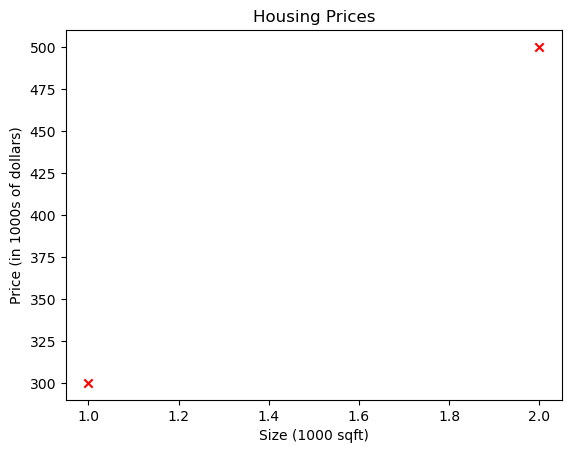

In [25]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [26]:
def compute_model(x, w, b):
    #total number of examples
    m = x.shape[0]
    # create a function as a one-dim array of size m filled with 0
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = w*x[i] + b

    return f_wb

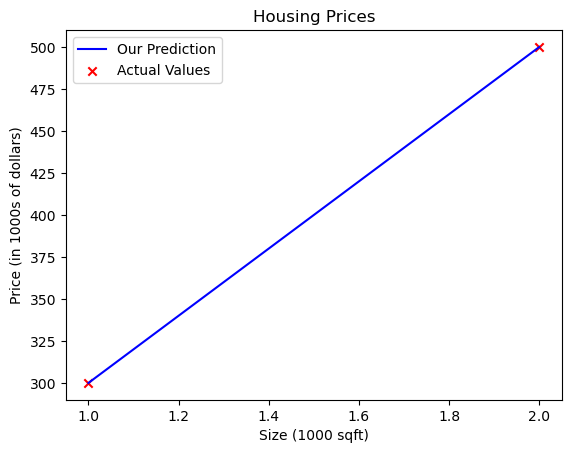

In [28]:
res_fwb = compute_model(x_train, 200, 100)

plt.plot(x_train, res_fwb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [29]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


In [30]:
## Compute cost function

def compute_cost(x, y, w, b):
    #total training examples
    m = x.shape[0]

    # we are calculating a cost function which is mean of sum of squared errors.
    # sum of squared errors
    squared_error_sum = 0

    for i in range(m):
        f_x = w*x[i] + b
        # get total sum of squared errors sum[(f(x).i - y.i)^2]
        squared_error_sum = squared_error_sum + (f_x - y[i])**2

    cost_function = (squared_error_sum/(2*m))

    return cost_function
    

In [35]:
compute_cost(x_train, y_train, 150, 100)

np.float64(3125.0)

In [36]:
## Compute gradient dj/db and dj/dw

def compute_gradient(x, y, w, b):

    # total training examples 
    m = x.shape[0]

    # sum of partial derivative dw
    sum_dj_dw = 0
    # sum of partial derivative db
    sum_dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw = (f_wb - y[i])*x[i]
        dj_db = (f_wb - y[i])

        sum_dj_db = sum_dj_db + dj_db
        sum_dj_dw = sum_dj_dw+ dj_dw

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing